In [2]:
import numpy as np
c =  np.array([[9,8,7] , [1,2,4]])
d =  np.array([[1,2,3] ,  [5,4,6]])
result = c + d
print(result.dtype)

int32


#### Fuel Data
* Determine and fill ```NA``` values in the fuel unit column

In [16]:
import pandas as pd
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
fuel_data = pd.read_csv(url) 
fuel_data.head()
# fuel_data.describe(include= 'all')
# fuel_data.isnull().sum()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


#### Using ```'groupby'``` to categorise dataframe into different segments.
* Split the dataframe into groups then apply a function to the groups after which the results are combined.

In [4]:
fuel = fuel_data.groupby('fuel_unit')['fuel_unit'].count()
# fuel_data['fuel_unit'] = fuel_data['fuel_unit'].fillna(value = 'mcf')
# fuel_data.isnull().sum()

fuel

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

#### Merging Dataframes
* Checking for duplicates

In [5]:
df1 = fuel_data.iloc[0:2000].reset_index(drop = True)
df2 = fuel_data.iloc[2000:].reset_index(drop = True)
assert len(fuel_data) == (len(df1) + len(df2))
fuel_data = pd.merge(df1, df2, how = 'left')


pd.merge(df1, df2, how = 'inner')
pd.merge(df1, df2, how = 'right')

fuel_data.duplicated().any()

False

#### Creating visuals with python

In [6]:
%pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt






[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(0.5, 1.0, 'Count of each fuel unit')

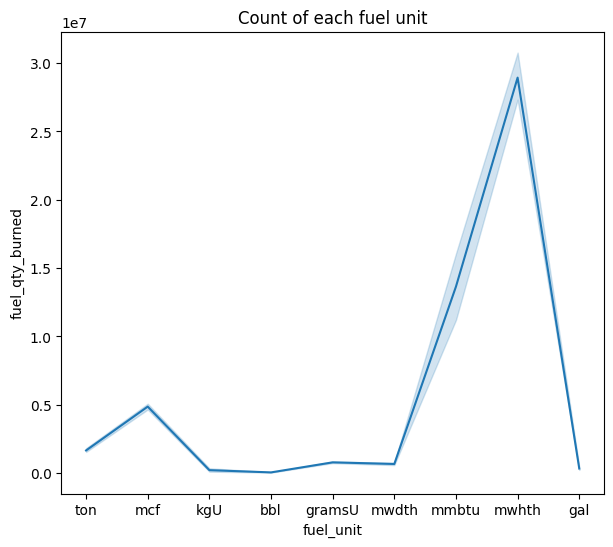

In [26]:
plt.figure(figsize = (7,6))
fuel_unit_count = fuel_data.groupby('fuel_unit')['fuel_unit'].count()
sns.lineplot(data = fuel_data,x = 'fuel_unit', y = 'fuel_qty_burned')
plt.title('Count of each fuel unit')


In [9]:
data = np.array([2,3,4,5,6,7,410])
df = pd.Series(data)
df[0:5]
df[5:]

5      7
6    410
dtype: int32